# load snps from vcf files

In [1]:
import allel
from os import path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData


data_dir = '/cellar/users/hsher/Data/popgen'
# fname = 'ALL.TGP_HGDP.GRCh37.bi.sorted.fixref.phased.isec.23andMe.5000-1000-0.01_pairwise.vcf.gz'
fname = "with_simon_delete_sex_missing.vcf.gz"  ## merged with Simon's genotypes
tabix = '/usr/local/bin/tabix'
info = allel.read_vcf(path.join(data_dir, fname),log=sys.stdout)



[read_vcf] 527 rows in 0.58s; chunk in 0.58s (901 rows/s)
[read_vcf] all done (898 rows/s)


In [2]:
sample = info['samples'] # sample ID

In [3]:
#to genotype array
gt = allel.GenotypeArray(info['calldata/GT'], dtype = 'i1')
gt = gt.to_n_alt(fill = -1)

# In this dataset we have 527 snps, 3434 individuals

In [4]:
gt.shape

(527, 3434)

# load metadata

In [9]:
%load_ext autoreload

%autoreload 2

In [10]:
# read 
sample_info = pd.read_pickle(path.join(data_dir,'sample_info.pickle'))



In [11]:
sample_info.columns

Index(['pop', 'super_pop', 'gender', 'batch'], dtype='object')

In [12]:
df2 = pd.DataFrame([['unknown','unknown','M','23andme']], columns=list(sample_info.columns), index = ['simon'])


In [13]:
sample_info = sample_info.append(df2)

In [15]:
# to use scanpy, everything has to go into AnnData, see https://anndata.readthedocs.io/en/stable/anndata.AnnData.html
adata = AnnData(X = gt.T, obs = sample_info.loc[sample])


In [16]:
# every other low dimensional visualization is based on PCA; pca is already slow for 15000 snps
sc.tl.pca(adata)


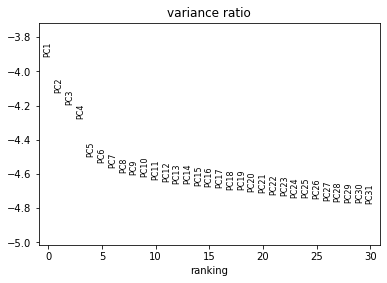

In [18]:
sc.pl.pca_variance_ratio(adata, log=True)

In [19]:
# use nearest neighbor way to fill -1 entry
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=8)


/cellar/users/hsher/miniconda3/envs/popgen/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


... storing 'pop' as categorical
... storing 'super_pop' as categorical
... storing 'gender' as categorical
... storing 'batch' as categorical


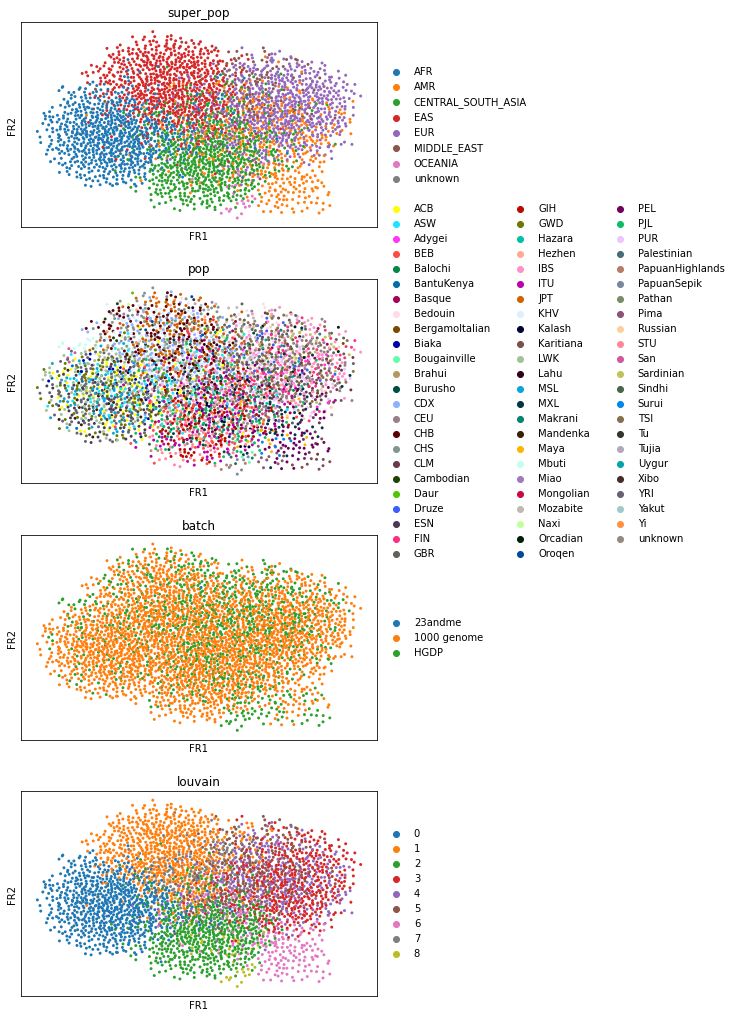

In [24]:
sc.tl.louvain(adata, resolution=1)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color = ['super_pop','pop', 'batch','louvain'], legend_loc = 'right margin', ncols = 1)

In [31]:
# customize color
# load custom colors
from custome_color import *
super_pop_color['unknown'] = 'black'
pop_to_color['unknown'] = 'black'
adata.uns['super_pop_colors'] = adata.obs['super_pop'].cat.categories.map(super_pop_color)
adata.uns['pop_colors'] = adata.obs['pop'].cat.categories.map(pop_to_color)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

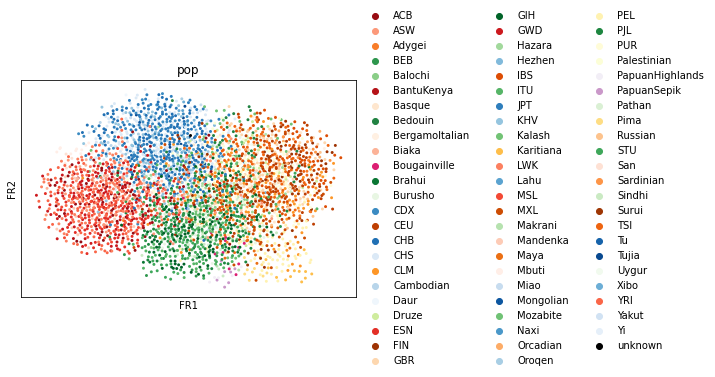

In [34]:
sc.pl.draw_graph(adata, color = ['pop'], legend_loc = 'right margin', ncols = 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

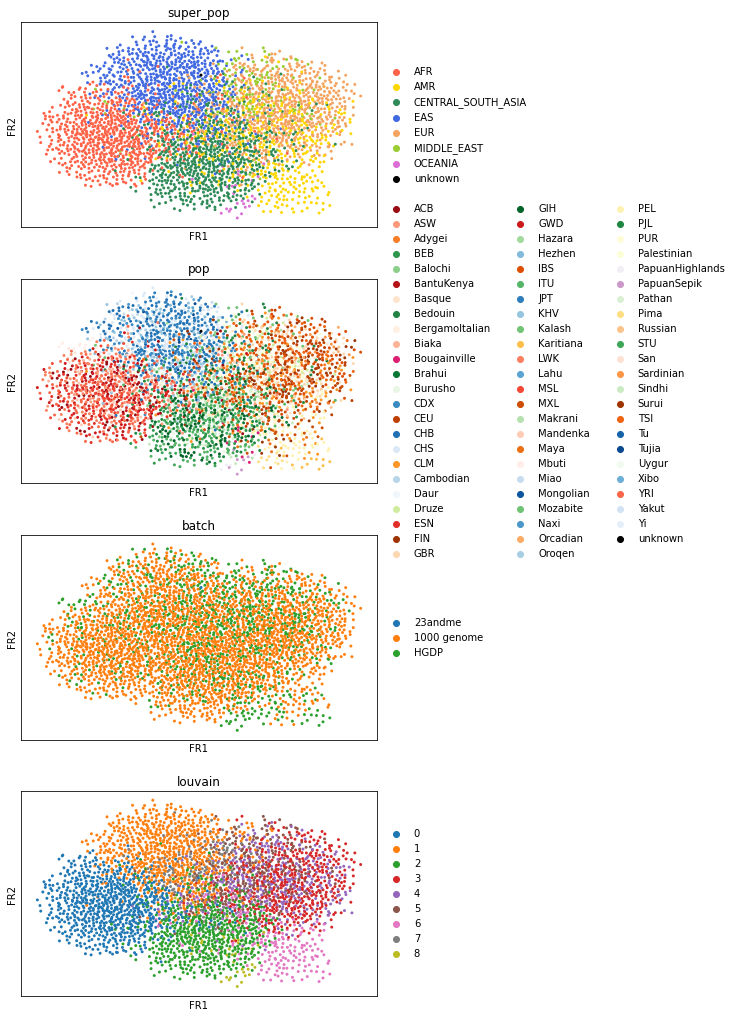

In [32]:
sc.pl.draw_graph(adata, color = ['super_pop','pop', 'batch','louvain'], legend_loc = 'right margin', ncols = 1)

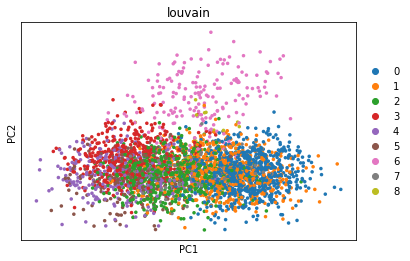

In [35]:
sc.pl.pca(adata, color='louvain', size=50)


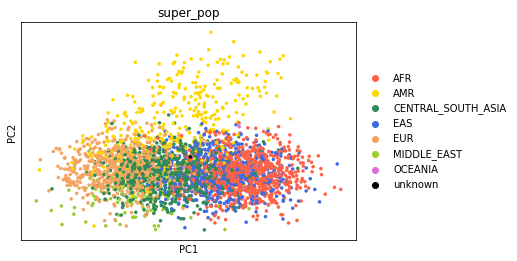

In [36]:
sc.pl.pca(adata, color='super_pop', size=50)

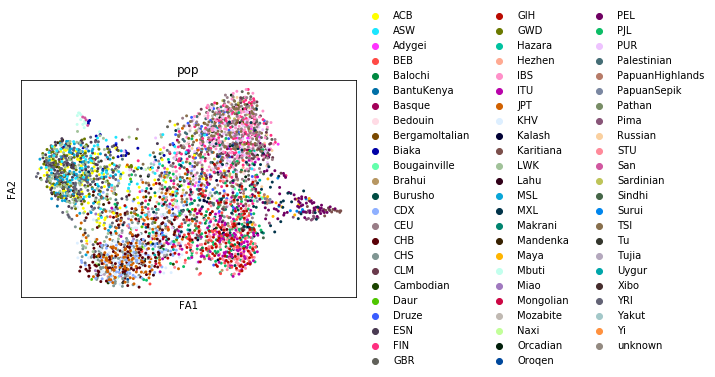

In [33]:
f,ax = plt.subplots(1,1)
# ax.text(0.5,0.5, 'this is simon')
sc.pl.draw_graph(adata, color = ['pop'], legend_loc = 'right margin', ncols = 1, ax = ax)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

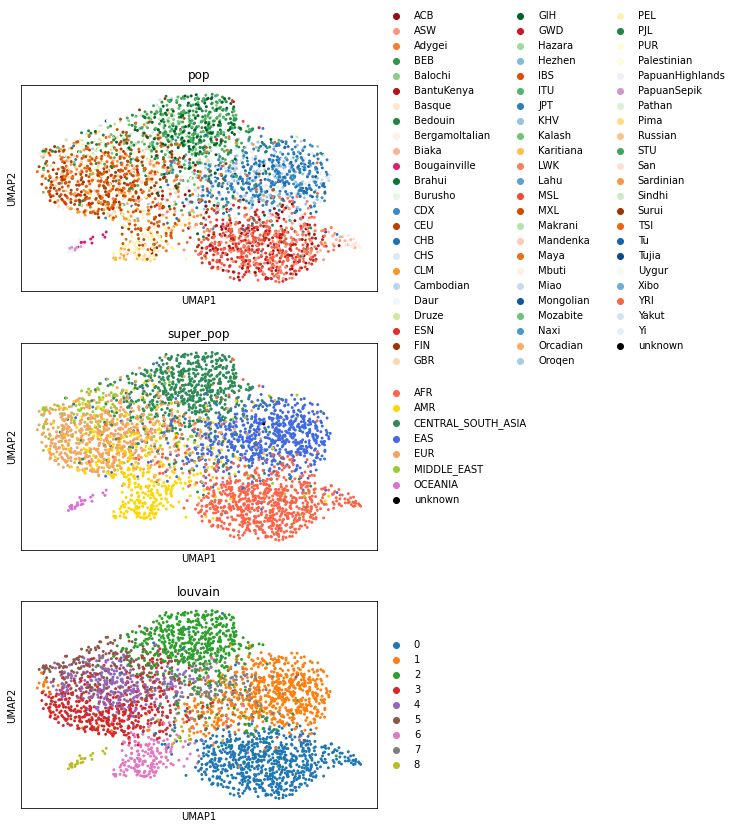

In [38]:
# do umap


sc.tl.umap(adata)
sc.pl.umap(adata, color = ['pop', 'super_pop', 'louvain'], legend_loc = 'right margin', ncols = 1)

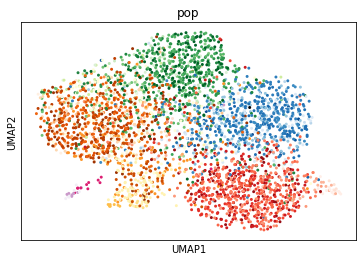

In [39]:
sc.pl.umap(adata, color = ['pop'], legend_loc = None)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

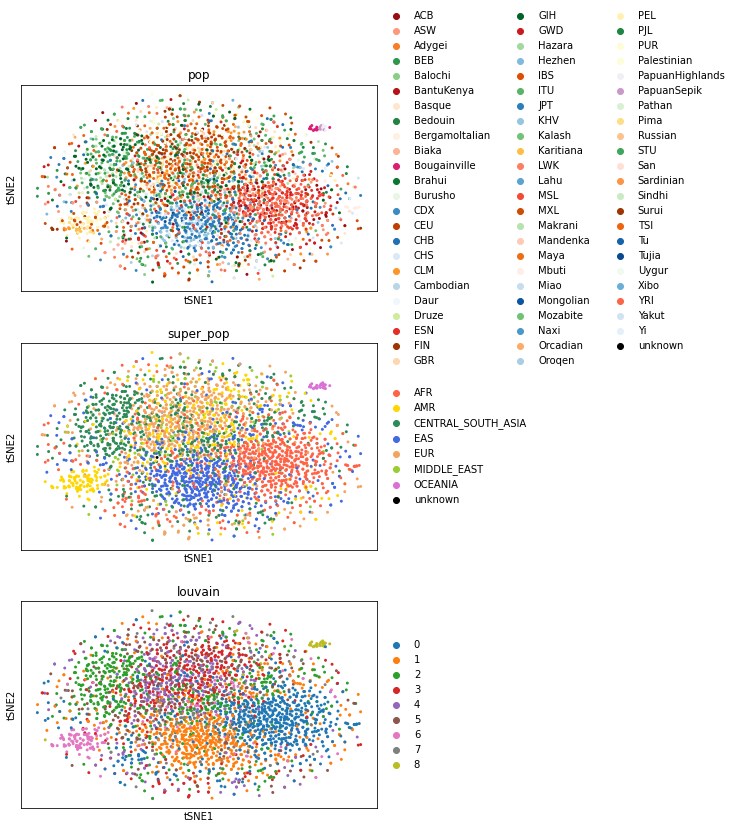

In [40]:
# to tsne
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = ['pop', 'super_pop', 'louvain'], legend_loc = 'right margin', ncols = 1)

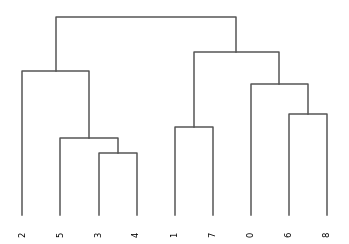

In [24]:
sc.tl.dendrogram(adata, groupby='louvain')
sc.pl.dendrogram(adata, groupby='louvain')
# sc.pl.dotplot(adata, groupby='louvain', dendrogram=True)

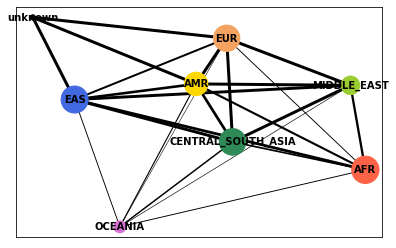

In [44]:
# do PAGA
sc.tl.paga(adata, groups='super_pop')
sc.pl.paga(adata, color=['super_pop'], max_edge_width = 3, node_size_scale= 4)

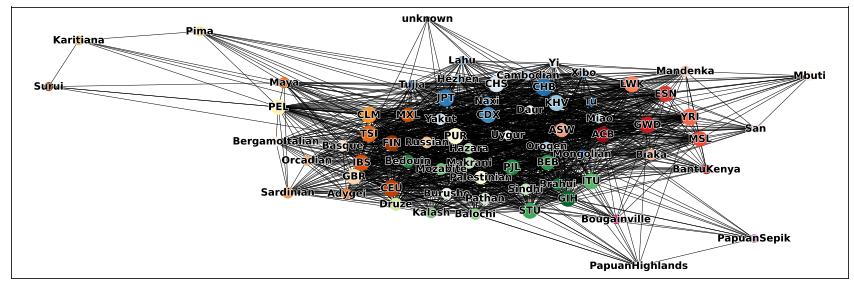

In [42]:
# do PAGA
_, axs = plt.subplots(ncols=1, figsize=(15, 5))
sc.tl.paga(adata, groups='pop', )
sc.pl.paga(adata, color=['pop'], max_edge_width = 0.5, node_size_scale= 1, layout = 'fr', ax = axs, fontoutline = 1)

In [38]:
adata

AnnData object with n_obs × n_vars = 3434 × 527
    obs: 'pop', 'super_pop', 'gender', 'batch', 'louvain'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'draw_graph', 'super_pop_colors', 'pop_colors', 'batch_colors', 'umap', 'dendrogram_louvain', 'paga', 'super_pop_sizes', 'pop_sizes'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# save file for later analysis

In [27]:
adata.uns['super_pop_colors'] = [] # these cannot be written into h5ad
adata.uns['pop_colors'] = []
adata.write(path.join(data_dir, 'par_knn.h5ad'))